In [8]:
import pickle
from pyteomics import pylab_aux as pa, usi
import matplotlib.pyplot as plt
from matchms import Scores, Spectrum
from matchms.similarity import CosineGreedy
import matplotlib.pyplot as plt
import numpy as np

In [9]:
train_theospecs = pickle.load(open('../data/train/theospec.pkl', 'rb'))
test_theospecs = pickle.load(open('../data/test/theospec.pkl', 'rb'))

In [10]:
train_meta = pickle.load(open('../data/train/meta.pkl', 'rb'))
test_meta = pickle.load(open('../data/test/meta.pkl', 'rb'))

In [11]:
train_spectrums = pickle.load(open('../data/train/spectrum.pkl', 'rb'))
test_spectrums = pickle.load(open('../data/test/spectrum.pkl', 'rb'))

In [12]:
# FNs
# Scan num, peptide
# mzml file: 01075_G01_P010693_S00_N07_R1.mzML
mzml_file = '01075_G01_P010693_S00_N07_R1.mzML'
spectrums_to_plot = [(17338, 'R.AIGGGLSSVGGGSSTIKYTTTSSSSR.K'),
 (8220, 'R.VHGPGIQSGTTNKPNKFTVETR.G'),
 (20555, 'K.TVLTGTKDTVC+57.021SGVTGAVNVAK.G'),
 (8223, 'R.VHGPGIQSGTTNKPNKFTVETR.G'),
 (8057, 'R.VHGPGIQSGTTNKPNKFTVETR.G')]

In [14]:
# spectrum = usi.proxi(
#     'mzspec:PXD004732:01650b_BC2-TUM_first_pool_53_01_01-3xHCD-1h-R2:scan:41840',
#     'massive')
# peptide = 'WNQLQAFWGTGK'
# pa.annotate_spectrum(spectrum, peptide, precursor_charge=2, backend='spectrum_utils',
#     ion_types='aby', title=peptide)
# plt.show()

3


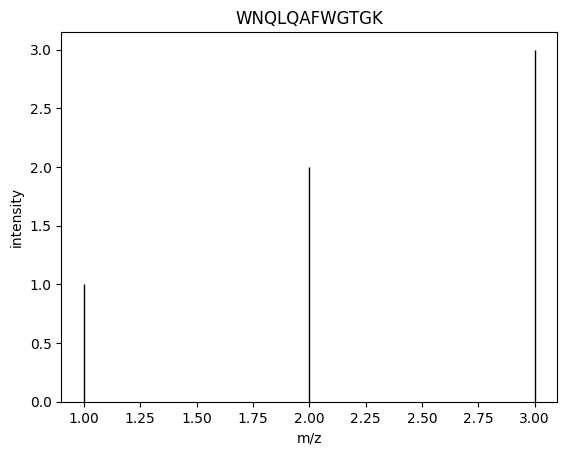

In [20]:
# spectrum = {'m/z array': [1,2,3], 'intensity array': [1,2,3]}
spectrum = {'m/z array': np.array([1,2,3]), 'intensity array': np.array([1,2,3])}
peptide = 'WNQLQAFWGTGK'
pa.annotate_spectrum(
    spectrum, 
    peptide, 
    precursor_charge=2, 
    # backend='spectrum_utils',
    ion_types='aby', 
    title=peptide)
plt.show()

In [47]:
import re
from pyteomics import mass, parser

mzml_file = '01075_G01_P010693_S00_N07_R1.mzML'
spectrums_to_plot = [(17338, 'R.AIGGGLSSVGGGSSTIKYTTTSSSSR.K'),
 (8220, 'R.VHGPGIQSGTTNKPNKFTVETR.G'),
 (20555, 'K.TVLTGTKDTVC+57.021SGVTGAVNVAK.G'),
 (8223, 'R.VHGPGIQSGTTNKPNKFTVETR.G'),
 (8057, 'R.VHGPGIQSGTTNKPNKFTVETR.G')]

new_spectrums = []

# Modify these names to not use mass shifts but the mod name instead
modifications = {
    'Oxidation': 15.994915,
    'Carbamidomethyl': 57.021464,
    'Phospho': 79.966331
}

for (scan_num, modified_peptide) in spectrums_to_plot:
    # Find modifications in the form of "+mass"
    pattern = r"\+([0-9\.]+)"
    matches = re.findall(pattern, modified_peptide)
    orig_peptide = modified_peptide

    # Replace "+mass" with the closest modification name
    for match in matches:
        modification_mass = float(match)
        closest_modification = min(modifications.keys(), key=lambda k: abs(modifications[k] - modification_mass))
        modified_peptide = modified_peptide.replace(f"+{match}", f"[{closest_modification}]")

    new_spectrums.append((scan_num, orig_peptide, modified_peptide))

    # parsed_peptide = parser.parse(modified_peptide, modifications=modifications)
    # spectrum = mass.spectrum(parsed_peptide, charge, ion_types='by', fragment=True)

for pair in new_spectrums:
    print(pair)
    # parsed_peptide = parser.parse(modified_peptide, modifications=modifications)
    # # Build spectrum from peptide with pyteomics
    

    # # spectrum = mass.spectrum(parsed_peptide, charge, ion_types='by', fragment=True)

    # pa.annotate_spectrum(
    #     spectrum, 
    #     peptide=pair[1], 
    #     precursor_charge=2, 
    #     # backend='spectrum_utils',
    #     ion_types='aby', 
    #     title=peptide[2:-2])
    # plt.show()

(17338, 'R.AIGGGLSSVGGGSSTIKYTTTSSSSR.K', 'R.AIGGGLSSVGGGSSTIKYTTTSSSSR.K')
(8220, 'R.VHGPGIQSGTTNKPNKFTVETR.G', 'R.VHGPGIQSGTTNKPNKFTVETR.G')
(20555, 'K.TVLTGTKDTVC+57.021SGVTGAVNVAK.G', 'K.TVLTGTKDTVC[Carbamidomethyl]SGVTGAVNVAK.G')
(8223, 'R.VHGPGIQSGTTNKPNKFTVETR.G', 'R.VHGPGIQSGTTNKPNKFTVETR.G')
(8057, 'R.VHGPGIQSGTTNKPNKFTVETR.G', 'R.VHGPGIQSGTTNKPNKFTVETR.G')


AIGGGLSSVGGGSSTIKYTTTSSSSR


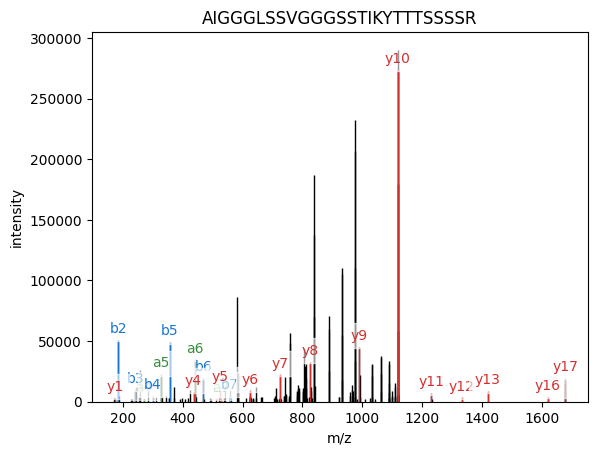

VHGPGIQSGTTNKPNKFTVETR


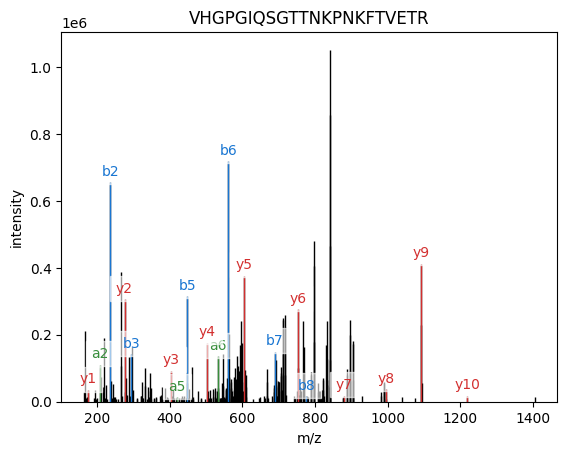

TVLTGTKDTVC[Carbamidomethyl]SGVTGAVNVAK


PyteomicsError: Pyteomics error, message: 'Unknown label: [C'

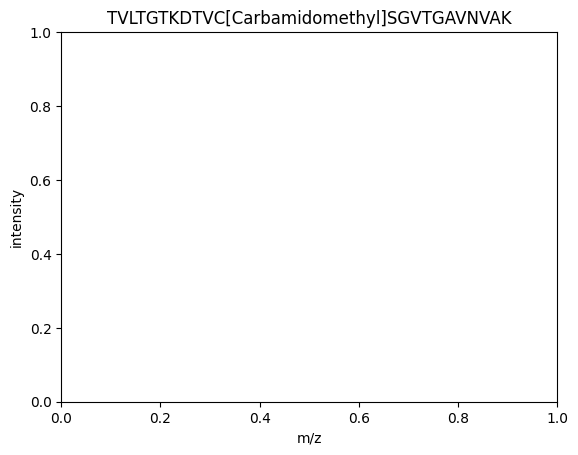

In [52]:
for (scan_num, orig_peptide, modified_peptide) in new_spectrums:
    mz_actual = test_spectrums[mzml_file][scan_num]['mz_arr']
    intensity_actual = test_spectrums[mzml_file][scan_num]['intensity_arr']

    mz_actual = np.array([float(x) for x in mz_actual])
    intensity_actual = np.array([float(x) for x in intensity_actual])

    spectrum_actual = {
        'm/z array': mz_actual, 
        'intensity array': intensity_actual
    }
    
    mz_theo = test_theospecs[orig_peptide]['mz_arr']
    intensity_theo = test_theospecs[orig_peptide]['intensity_arr']

    mz_theo = np.array([int(x) for x in mz_theo])
    intensity_theo = np.array([int(x) for x in intensity_theo])

    spectrum_theo = {
        'm/z array': mz_theo, 
        'intensity array': intensity_theo
    }

    # Calculate cosine similarity between the 2 spectra
    # cosine_greedy = CosineGreedy(tolerance=0.2)
    # score = cosine_greedy.pair(spectrum_actual, spectrum_theo) 

    # spectrum = {'m/z array': np.array([1,2,3]), 'intensity array': np.array([1,2,3])}
    # peptide = 'WNQLQAFWGTGK'
    print(modified_peptide[2:-2])
    pa.annotate_spectrum(
        spectrum_actual, 
        modified_peptide[2:-2], 
        precursor_charge=2, 
        # backend='spectrum_utils',
        ion_types='aby', 
        title=modified_peptide[2:-2])
    plt.show()


2023-05-31 12:41:43,189:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 12:41:43,190:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 12:41:43,454:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 12:41:43,454:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 12:41:43,751:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 12:41:43,752:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 12:41:44,032:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 12:41:44,033:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 12:41:44,324:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-31 12:41:44,325:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


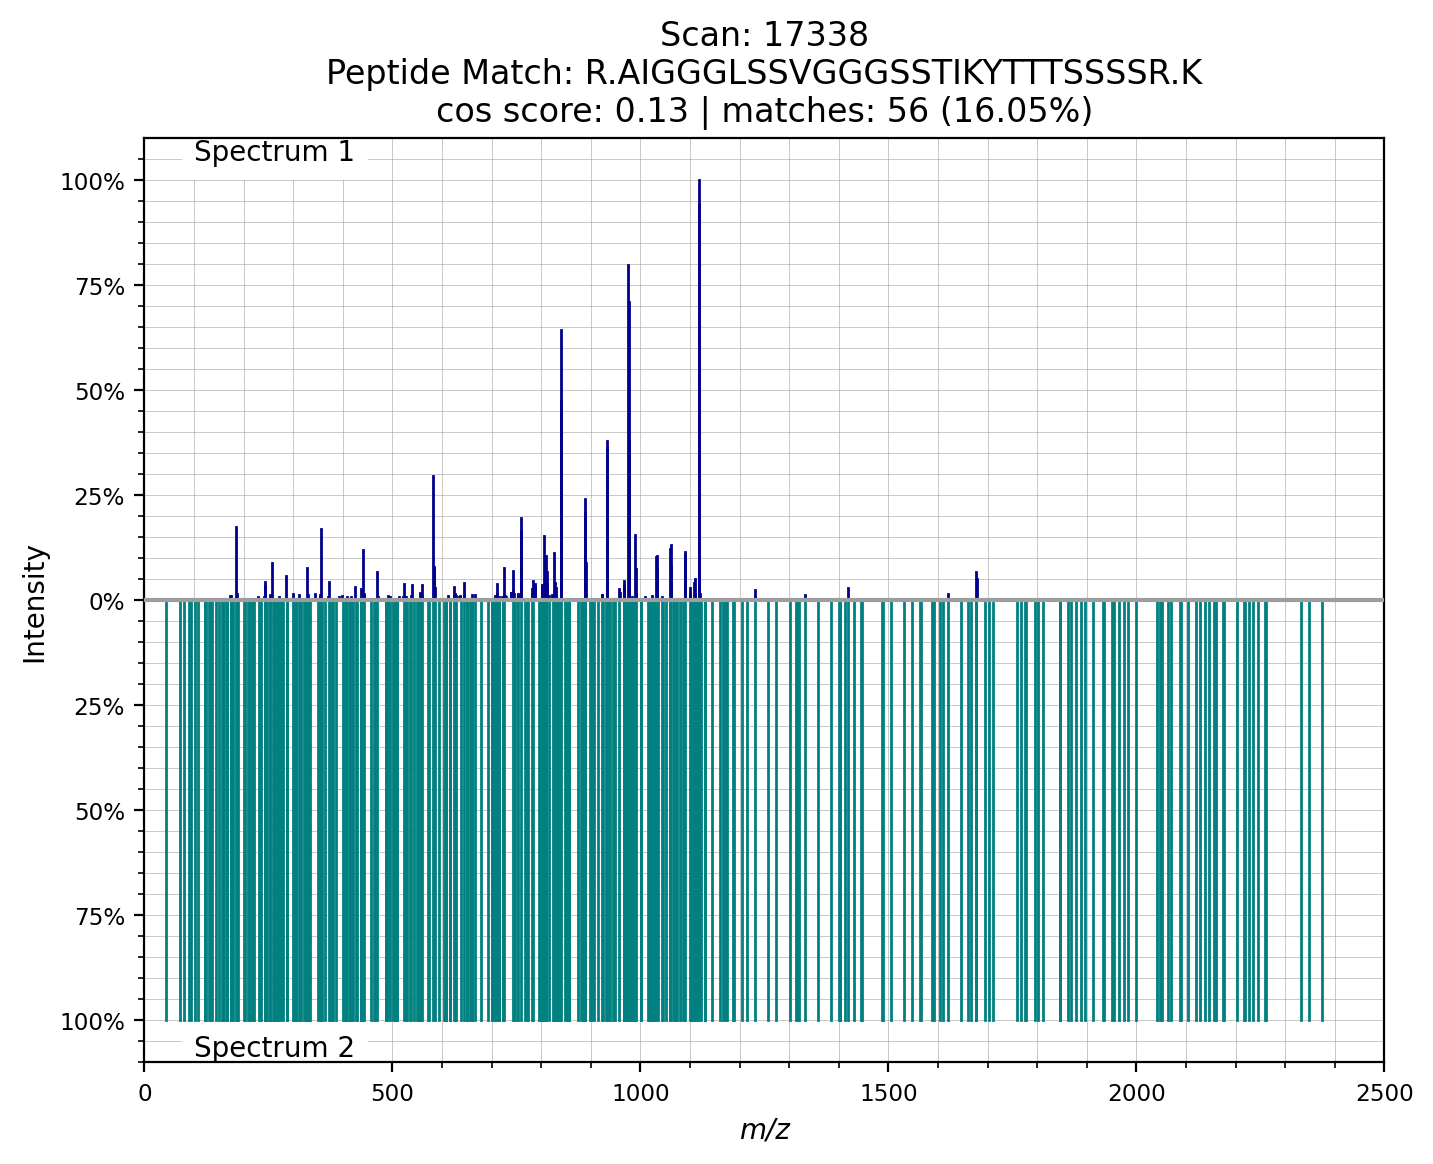

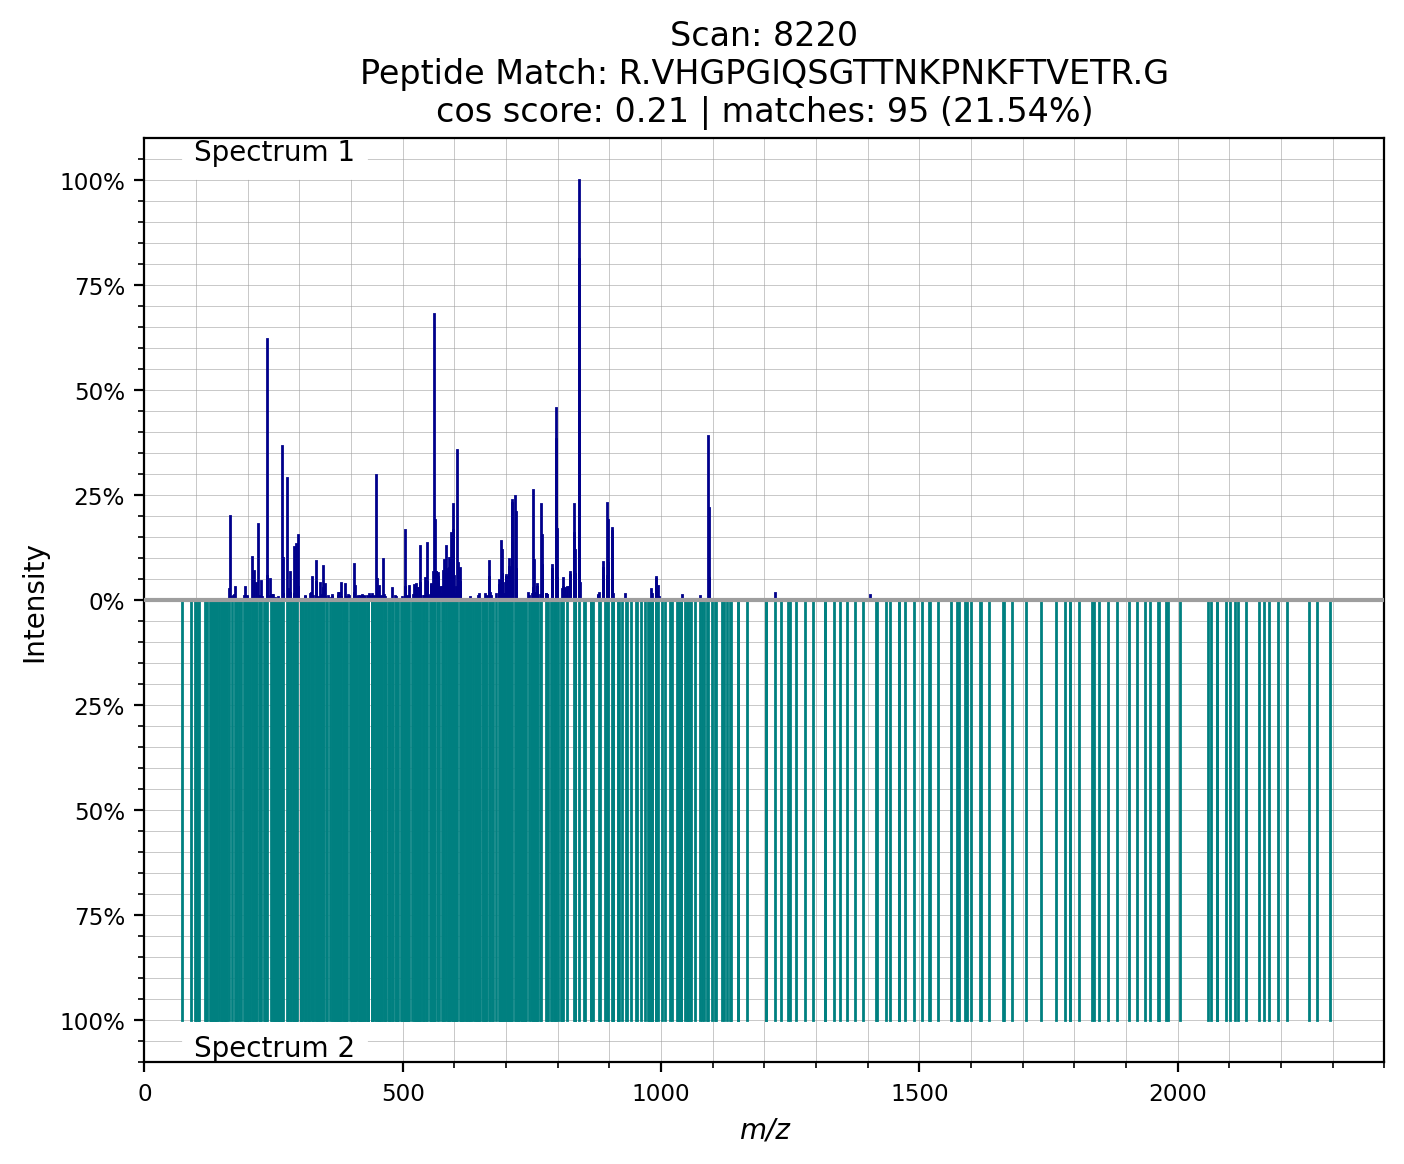

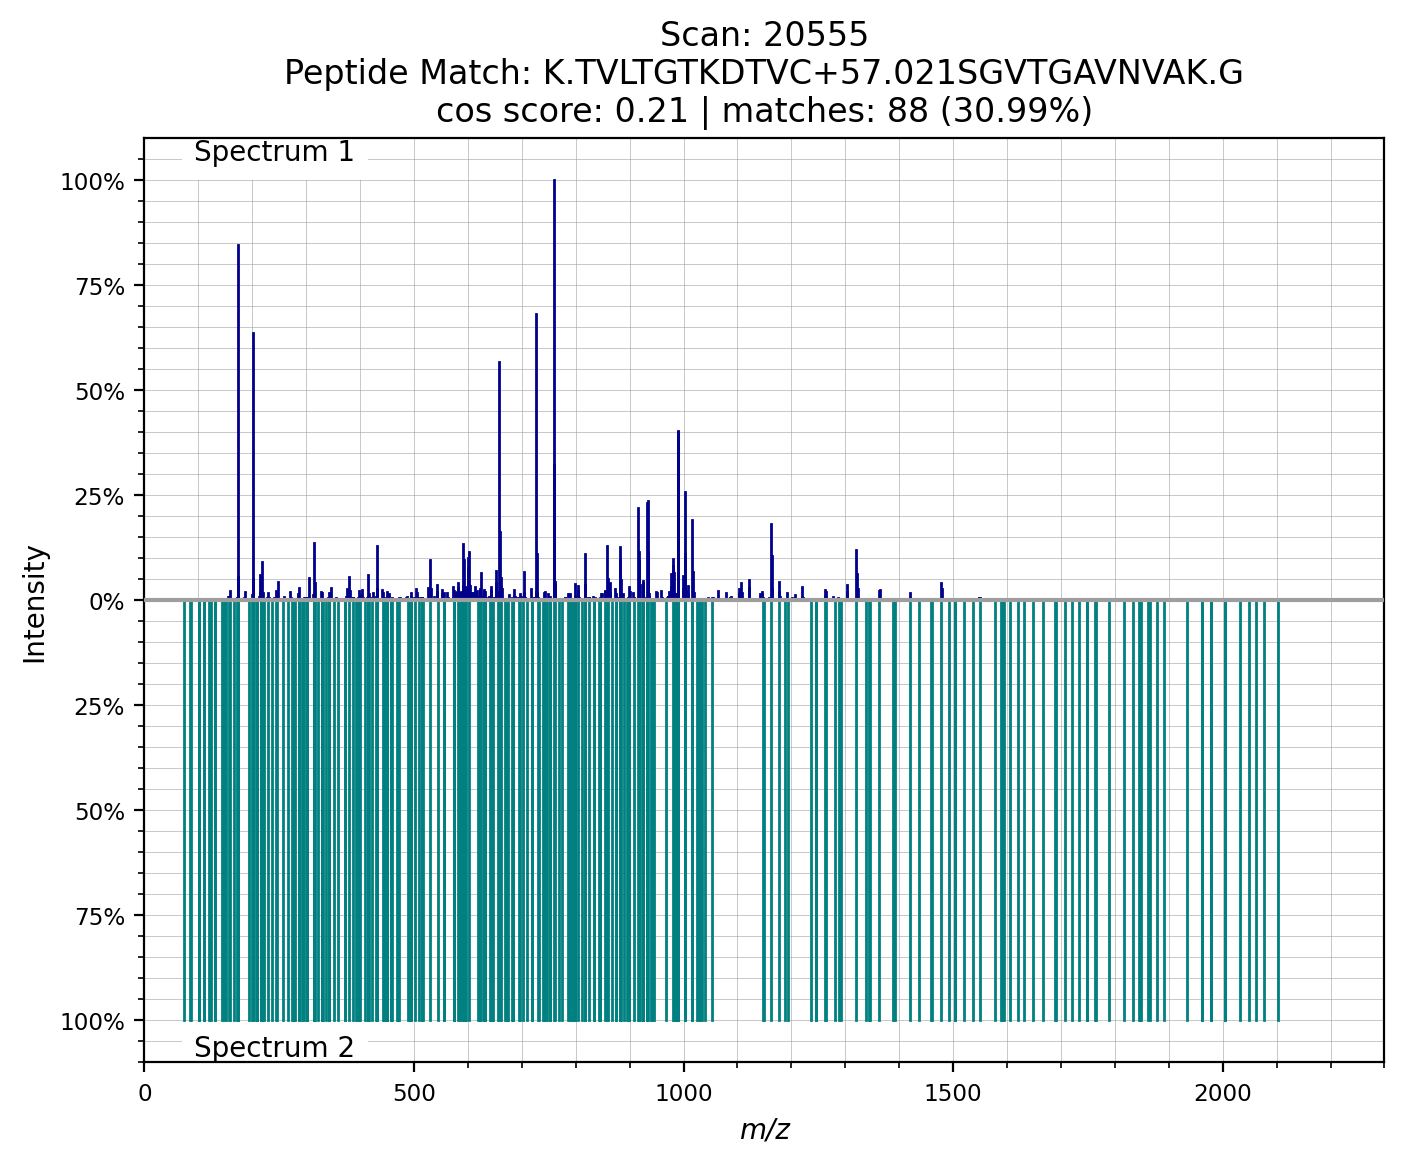

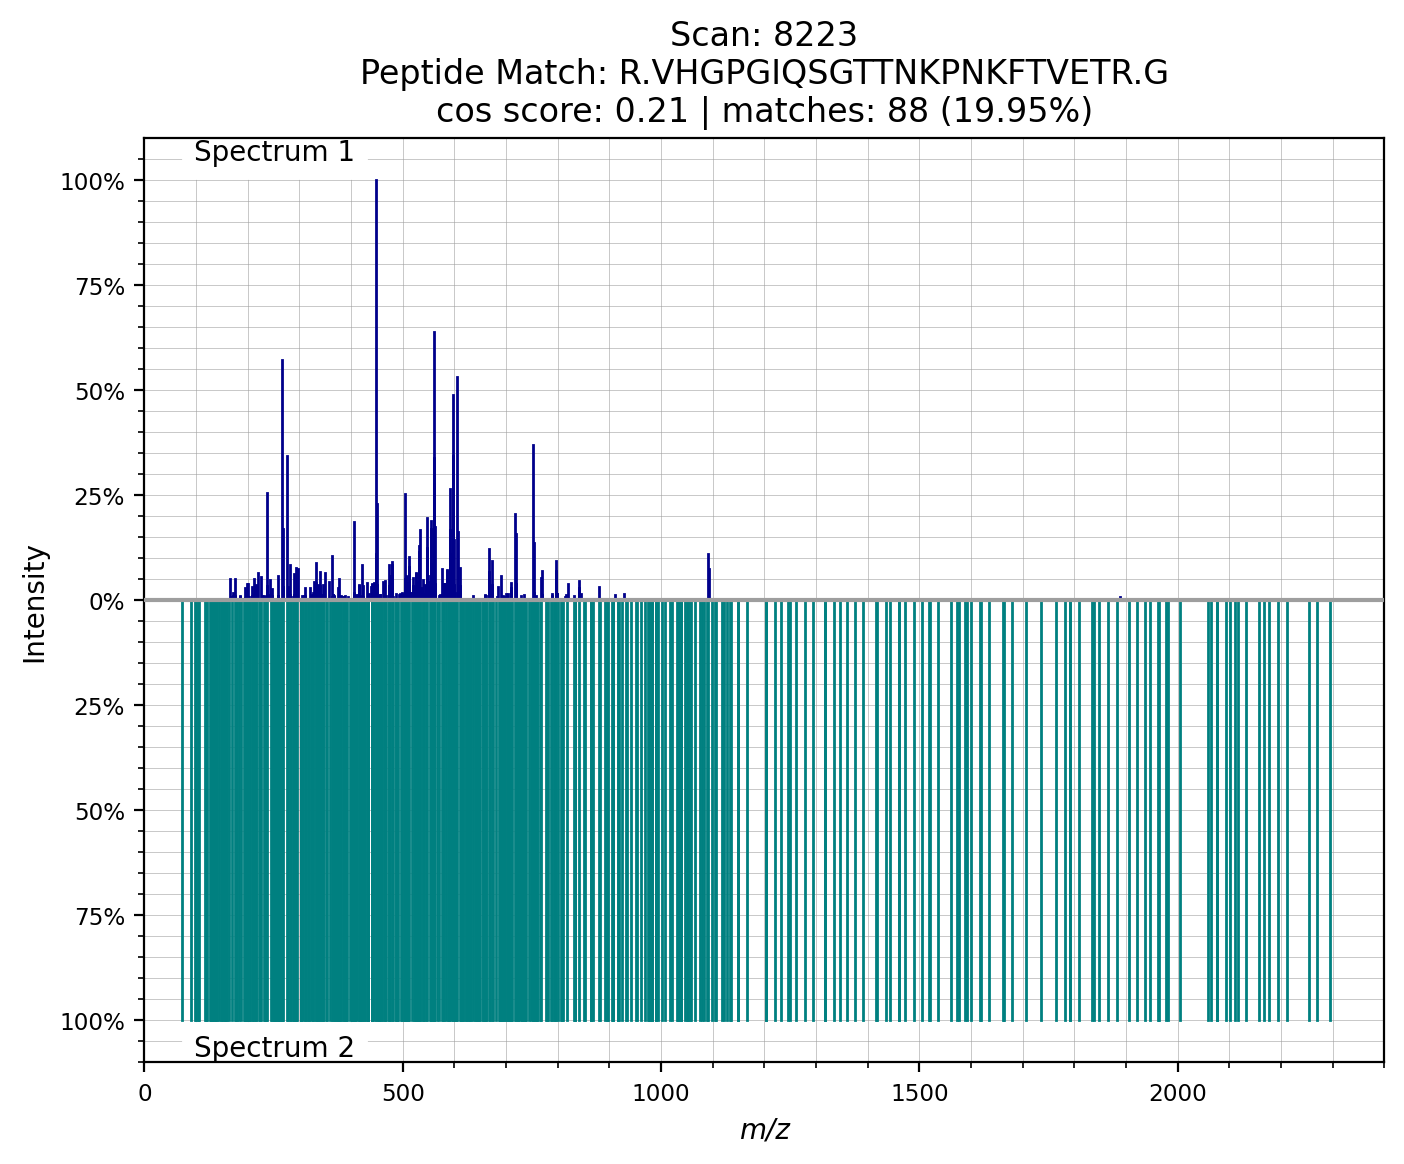

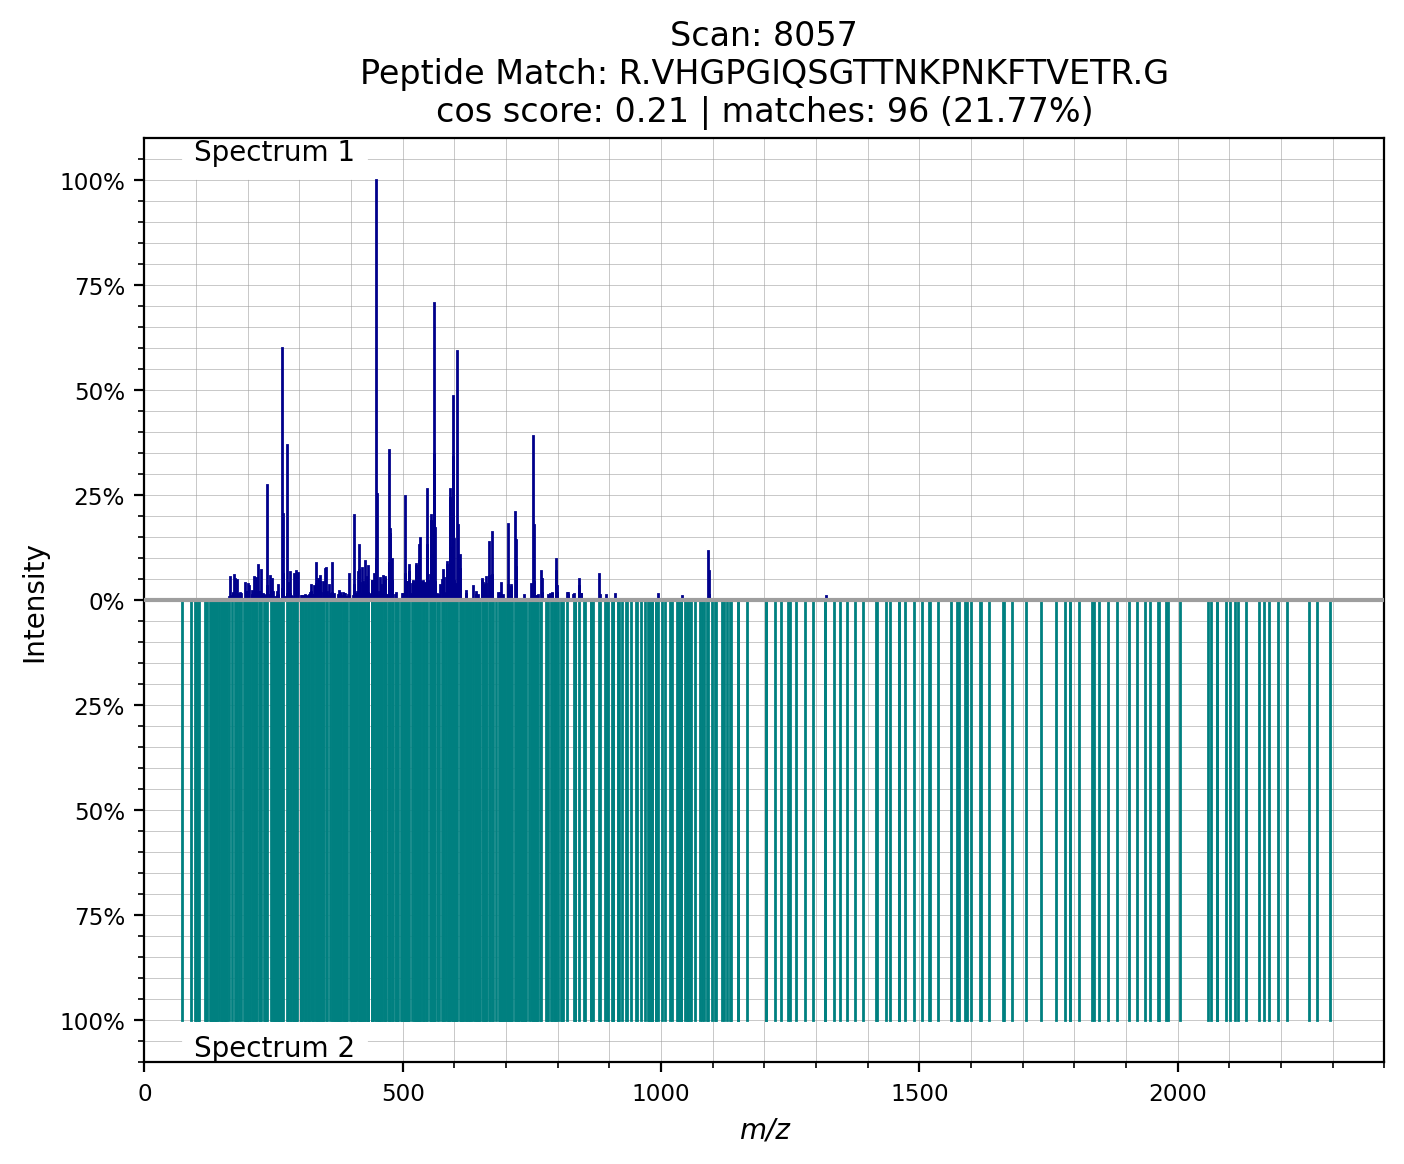

In [ ]:
# for (scan_num, peptide) in spectrums_to_plot:
#     mz_actual = test_spectrums[mzml_file][scan_num]['mz_arr']
#     intensity_actual = test_spectrums[mzml_file][scan_num]['intensity_arr']

#     mz_actual = np.array([float(x) for x in mz_actual])
#     intensity_actual = np.array([float(x) for x in intensity_actual])
    
#     spectrum_actual = Spectrum(mz=mz_actual,
#                         intensities=intensity_actual,
#                         metadata={'id': 'theospec'})
    
#     mz_theo = test_theospecs[peptide]['mz_arr']
#     intensity_theo = test_theospecs[peptide]['intensity_arr']

#     mz_theo = np.array([float(x) for x in mz_theo])
#     intensity_theo = np.array([float(x) for x in intensity_theo])

#     spectrum_theo = Spectrum(mz=mz_theo,
#                     intensities=intensity_theo,
#                     metadata={'id': 'theospec'})

#     # Calculate cosine similarity between the 2 spectra
#     cosine_greedy = CosineGreedy(tolerance=0.2)
#     score = cosine_greedy.pair(spectrum_actual, spectrum_theo) 
    
#     spectrum_actual.plot_against(spectrum_theo)
#     plt.title(f"Scan: {scan_num}\nPeptide Match: {peptide}\ncos score: {score['score']:.2f} | matches: {score['matches']} ({score['matches'] / len(spectrum_theo.peaks) * 100:.2f}%)")
#     # plt.show()
#     # Save the plot with the scan number and peptide in filename
#     plt.savefig(f'../data/eda/FN_{scan_num}_{peptide}.png')
